In [79]:
import pandas as pd 
import json 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xlsxwriter
from io import BytesIO
from scipy.signal import find_peaks


In [15]:
f = open('RP_1_0001-dump.json')

In [16]:
data = json.load(f)

In [93]:
import os 
os.system("pyOTDR otdrTraces/e2s/RP_1_0004.sor")
   
      



1

In [17]:
l=[]
for i in range(1,100):
    try:
        l.append((data['KeyEvents']['event {}'.format(i)]['distance'],
                  data['KeyEvents']['event {}'.format(i)]['refl loss'],
                  data['KeyEvents']['event {}'.format(i)]['splice loss'],
                  data['KeyEvents']['event {}'.format(i)]['peak'],
                  data['KeyEvents']['event {}'.format(i)]['end of curr'],
                  data['KeyEvents']['event {}'.format(i)]['end of prev'],
                  data['KeyEvents']['event {}'.format(i)]['slope'],
                  data['KeyEvents']['event {}'.format(i)]['start of curr'],
                  data['KeyEvents']['event {}'.format(i)]['start of next'],
                  data['KeyEvents']['event {}'.format(i)]['type']))
    except:
        break
    

df = pd.DataFrame(l, columns =['Distance','ReflectionLoss','SpliceLoss','Peak','EndOfCurr','EndOfPrev','Slope','StartOfCurr','StartOfNext','Type'])
df = df.drop(['EndOfCurr','EndOfPrev','StartOfCurr','StartOfNext','Peak','Slope','Type'],axis=1)
# df.to_excel('data1.xlsx',index=False)
df

,Distance,ReflectionLoss,SpliceLoss
0,0.000,-30.516,0.000
1,1.062,-26.368,0.040
2,2.124,-32.124,-0.375


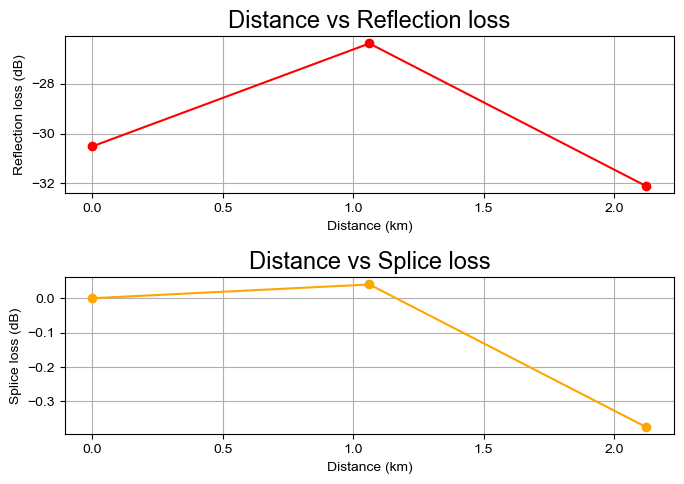

In [18]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(7,5)
fig.set_tight_layout('tight')
sns.set_theme()
sns.set(rc={'axes.facecolor':'#e5e5e5','figure.facecolor':'#ffffff','grid.color': '#efefef','grid.linestyle':'dotted'})


x=df['Distance'].to_list()
y=df['ReflectionLoss'].to_list()
z=df['SpliceLoss'].to_list()

x=[float(i) for i in x]
y=[float(i) for i in y]
z=[float(i) for i in z]

ax[0].plot(x,y,'red',marker='o',linewidth=1.5)
ax[1].plot(x,z,'orange',marker='o',linewidth=1.5)

ax[0].set_xlabel('Distance (km)',fontsize=10)
ax[1].set_xlabel('Distance (km)',fontsize=10)
ax[0].set_ylabel('Reflection loss (dB)',fontsize=10)
ax[1].set_ylabel('Splice loss (dB)',fontsize=10)
ax[1].set_title('Distance vs Splice loss',fontsize=17)
ax[0].set_title('Distance vs Reflection loss',fontsize=17)

ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()

plt.savefig("mygraph.png")

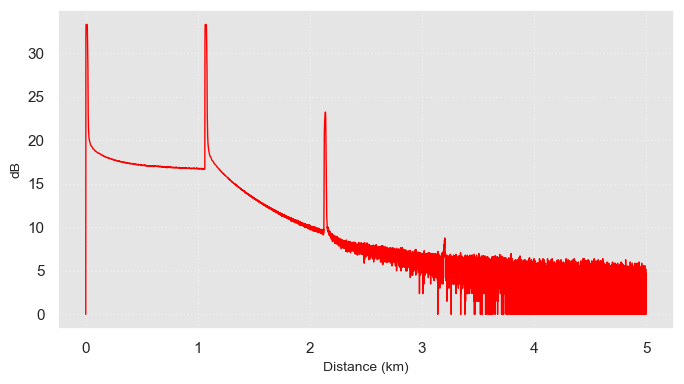

In [6]:
fig,ax=plt.subplots()
fig.set_size_inches(7,4)
fig.set_tight_layout('tight')

sns.set_theme()
sns.set(rc={'axes.facecolor':'#e5e5e5','figure.facecolor':'#fefefe','grid.color':'#ffffff'})
ax.set_xlabel('Distance (km)',fontsize=10)
ax.set_ylabel('dB',fontsize=10)
ax.grid(True)



plt.plot(*np.loadtxt("data/data.dat",unpack=True),color='red',linewidth=1)
plt.savefig("fig.png")

findfont: Font family ['Montserrat'] not found. Falling back to DejaVu Sans.


[   5  837 1674]
5       0.007660
837     1.069810
1674    2.138344
Name: Distance, dtype: float64


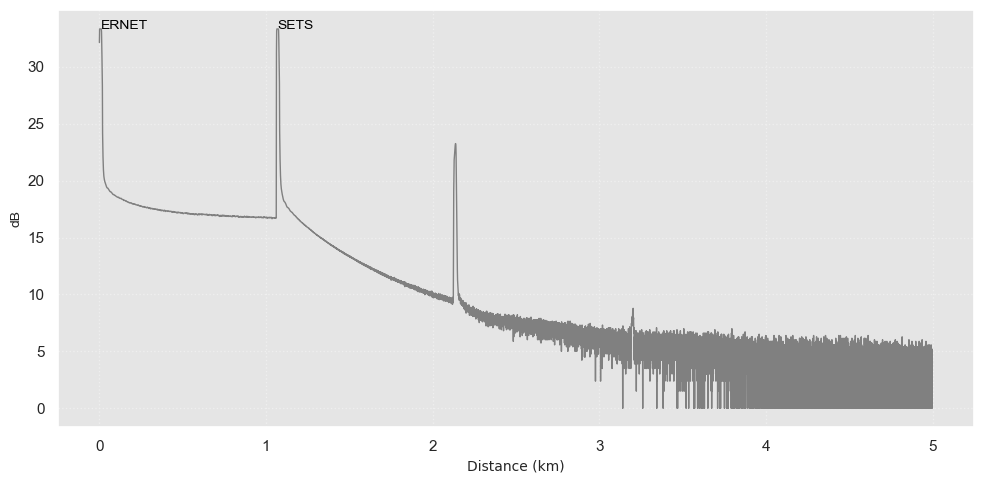

In [21]:
df1= pd.read_table('RP_1_0001-trace.dat', sep='\s+')
df1.columns=['Distance','dB']
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
fig.set_tight_layout('tight')
sns.set_style("whitegrid")
# sns.set(rc={'axes.facecolor':'#e5e5e5','figure.facecolor':'#fefefe','grid.color':'#ffffff'})
# sns.set_theme()
# sns.set(rc={'axes.facecolor':'#ffffff','figure.facecolor':'#ffffff','grid.color':'#e5e5e5'})
ax.set_xlabel('Distance (km)',fontsize=10,fontname='Montserrat')
ax.set_ylabel('dB',fontsize=10)
ax.grid(True)
peaks, _ = find_peaks(df1['dB'], height=20)
print(peaks)
print(df1['Distance'][peaks])
# plt.plot(df1.Distance[peaks],df1.dB[peaks], "x",color='red')
plt.plot(df1.Distance,df1.dB,linewidth=1,color='grey')
names=['ERNET','SETS','']
for val in peaks:
    plt.text(df1.Distance[val],df1.dB[val],names[peaks.tolist().index(val)],fontsize=10,fontname='Montserrat',color='black',fontfamily='sans-serif')
plt.savefig("fig.png")

In [78]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks


df1= pd.read_table('RP_1_0001-trace.dat', sep='\s+')
df1.columns=['Distance','dB']
indices = find_peaks(df1['dB'],height=20)[0]
print(indices)

fig = go.Figure()
fig.add_trace(go.Line(
    x=df1['Distance'],
    y=df1['dB'],   
    name='Loss'
    # mode='lines+markers',
))
names=['ERNET','SETS','']
fig.add_trace(go.Scatter(
    x=[df1['Distance'][i] for i in indices if i!=''],
    y=[df1['dB'][j] for j in indices if j!=''],
    text=['ERNET','SETS','GHOST'],
    textposition="top center",
    mode='markers+text',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Peaks'
))

fig.update_layout(
    font_family="Montserrat Semibold",
    font_color="black"    
)

fig.show()

[   5  837 1674]


In [44]:
print(df1['Distance'][peaks])

5       0.007660
837     1.069810
1674    2.138344
Name: Distance, dtype: float64


In [7]:
data['FxdParams']['date/time'][0:19]

'Fri Jul 22 09:01:12'

In [95]:
out=(['Date/time',data['FxdParams']['date/time'][0:19]],
     ['Wavelength',data['FxdParams']['wavelength']],
     ['Pulse width',data['FxdParams']['pulse width']],
     ['Range',data['FxdParams']['range']],
     ['Resolution',data['FxdParams']['resolution']])


In [101]:
out={'Date/time':data['FxdParams']['date/time'][0:19],
     'Wavelength':data['FxdParams']['wavelength'],
     'Pulse width':data['FxdParams']['pulse width'],
     'Range':data['FxdParams']['range'],
     'Resolution':data['FxdParams']['resolution']}
dff = pd.DataFrame.from_dict(out,orient='index')
dff

,0
Date/time,Mon Mar 13 15:42:20
Wavelength,131.0 nm
Pulse width,100 ns
Range,4.999256
Resolution,1.276623


In [96]:
pd.DataFrame(out)

,0,1
0,Date/time,Mon Mar 13 15:42:20
1,Wavelength,131.0 nm
2,Pulse width,100 ns
3,Range,4.999256
4,Resolution,1.276623


In [24]:
f = open('data/data2.json')

In [25]:
data = json.load(f)

In [30]:
import xlsxwriter
from io import BytesIO

writer = pd.ExcelWriter('data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', startrow=9, header=True,index=False)
 
workbook = writer.book
 
# By default worksheet names in the spreadsheet will be
# Sheet1, Sheet2 etc., but we can also specify a name.
worksheet = writer.sheets["Sheet1"]
 
# Some data we want to write to the worksheet.
out=(['Date/time',data['FxdParams']['date/time'][0:19]],
     ['Wavelength',data['FxdParams']['wavelength']],
     ['Pulse width',data['FxdParams']['pulse width']],
     ['Range',data['FxdParams']['range']],
     ['Resolution',data['FxdParams']['resolution']])

# Start from the first cell. Rows and
# columns are zero indexed.
heading = workbook.add_format({'bold': True,'font_size': 18})
worksheet.write(0,7,'OTDR data',heading)
worksheet.set_column(0,3,15)

row = 2
col = 0
 
# Iterate over the data and write it out row by row.
for field,value in (out):
    worksheet.write(row, col, field)
    worksheet.write(row, col + 1, value)
    row += 1

# chart = workbook.add_chart({'type': 'line'})
# df.to_excel(worksheet,sheet_name='My Sheet',startrow=7,header=False)

filename = 'fig.png'

file = open(filename, 'rb')
img = BytesIO(file.read())
file.close()
worksheet.insert_image('E4', filename, {'image_data': img})
 
workbook.close()